# Capstone Project

## Exploring Gender Wage Disparities

In this notebook I will be exploring the US Bureau of Labor and Statistics January 2015 report on income by gender and occupation. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

Inputing data, cleaning it up, exploring and creating new features.

In [21]:
genderwage = pd.read_csv('/Users/Beba/Documents/JupyterNotebooks/CapstoneProject/inc_occ_gender.csv')
genderwage.head(15)

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na
5,Advertising and promotions managers,55,1050,29,Na,26,Na
6,Marketing and sales managers,948,1462,570,1603,378,1258
7,Public relations and fundraising managers,59,1557,24,Na,35,Na
8,Administrative services managers,170,1191,96,1451,73,981
9,Computer and information systems managers,636,1728,466,1817,169,1563


In [6]:
genderwage.describe()

,All_workers,M_workers,F_workers
count,558.000000,558.000000,558.000000
mean,586.458781,326.593190,259.831541
std,4758.979138,2654.600532,2142.551053
min,0.000000,0.000000,0.000000
25%,21.000000,11.000000,3.000000
50%,67.000000,33.500000,18.000000
75%,253.000000,121.750000,84.000000
max,109080.000000,60746.000000,48334.000000


In [7]:
genderwage.dtypes

Occupation     object
All_workers     int64
All_weekly     object
M_workers       int64
M_weekly       object
F_workers       int64
F_weekly       object
dtype: object

In [8]:
genderwage[['All_weekly',
            'M_weekly',
            'F_weekly']] = genderwage[['All_weekly',
                                       'M_weekly',
                                       'F_weekly']].apply(pd.to_numeric, errors='coerce')

In [9]:
genderwage.dtypes

Occupation      object
All_workers      int64
All_weekly     float64
M_workers        int64
M_weekly       float64
F_workers        int64
F_weekly       float64
dtype: object

In [10]:
genderwage.isnull().sum()

Occupation       0
All_workers      0
All_weekly     236
M_workers        0
M_weekly       326
F_workers        0
F_weekly       366
dtype: int64

In [16]:
no_wage_df = genderwage.where(genderwage['F_weekly'].isnull()==True)
no_wage_df.head(10) # why do you have nan values?!

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Legislators,8.0,NaN,5.0,NaN,4.0,NaN
5,Advertising and promotions managers,55.0,1050.0,29.0,NaN,26.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Public relations and fundraising managers,59.0,1557.0,24.0,NaN,35.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
no_wage_df.isnull().sum()

Occupation     192
All_workers    192
All_weekly     428
M_workers      192
M_weekly       468
F_workers      192
F_weekly       558
dtype: int64

In [18]:
cleanedgenderwage = genderwage.dropna(axis=0, how='any')

In [19]:
cleanedgenderwage.describe()

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2065.781690,921.098592,1122.471831,1017.535211,943.260563,827.471831
std,9298.336804,368.672668,5190.515099,411.970023,4182.313327,323.042686
min,108.000000,391.000000,53.000000,401.000000,50.000000,380.000000
25%,253.250000,619.250000,108.250000,675.000000,107.000000,566.750000
50%,560.500000,898.500000,278.000000,992.500000,201.500000,773.500000
75%,1294.500000,1162.500000,620.250000,1343.750000,551.250000,1021.000000
max,109080.000000,2041.000000,60746.000000,2251.000000,48334.000000,1836.000000


In [27]:
# make wage gap column & gender ratio column
cleanedgenderwage['WageGap'] = cleanedgenderwage['M_weekly'] - cleanedgenderwage['F_weekly']
cleanedgenderwage['WageRatio'] = cleanedgenderwage['F_weekly'] / cleanedgenderwage['M_weekly']
cleanedgenderwage['GenderRatio'] = cleanedgenderwage['F_workers'] / cleanedgenderwage['M_workers']
cleanedgenderwage['All_Workers_Difference'] = cleanedgenderwage['All_workers'] - (cleanedgenderwage['M_workers'] + cleanedgenderwage['F_workers'])
cleanedgenderwage['F_share'] = cleanedgenderwage['F_workers'] / cleanedgenderwage['All_workers']
cleanedgenderwage['M_share'] = cleanedgenderwage['M_workers'] / cleanedgenderwage['All_workers']

In [73]:
cleanedgenderwage.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap,WageRatio,GenderRatio,F_share,M_share,All_Workers_Difference
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,169.0,0.811173,0.795674,0.443106,0.556894,0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,347.0,0.766487,0.701991,0.412420,0.587500,1
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0,415.0,0.815637,0.370904,0.270554,0.729446,0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,345.0,0.743875,0.325282,0.245443,0.754557,0
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0,345.0,0.784779,0.663158,0.398734,0.601266,0


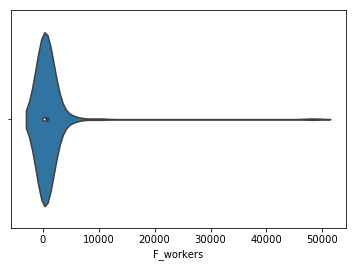

In [34]:
sns.violinplot(x='F_workers', data=cleanedgenderwage)
plt.show()

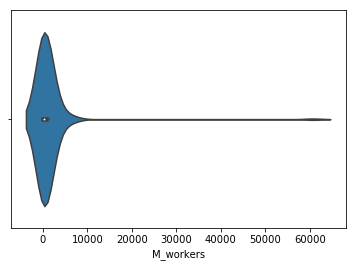

In [35]:
sns.violinplot(x='M_workers', data=cleanedgenderwage)
plt.show()

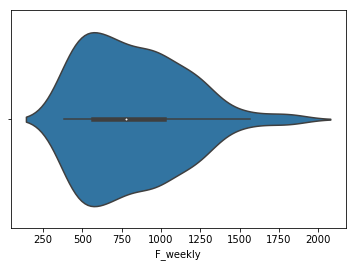

In [36]:
sns.violinplot(x='F_weekly', data=cleanedgenderwage)
plt.show()

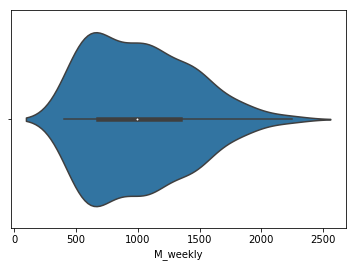

In [37]:
sns.violinplot(x='M_weekly', data=cleanedgenderwage)
plt.show()

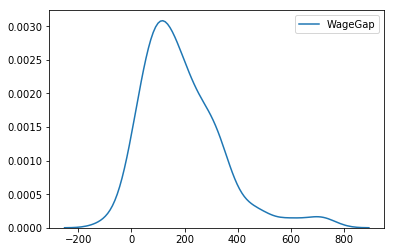

In [38]:
sns.kdeplot(data=cleanedgenderwage['WageGap'])

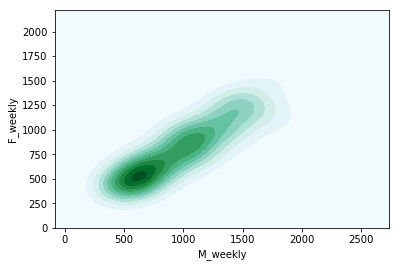

In [39]:
sns.kdeplot(data=cleanedgenderwage['M_weekly'], data2=cleanedgenderwage['F_weekly'], shade=True)

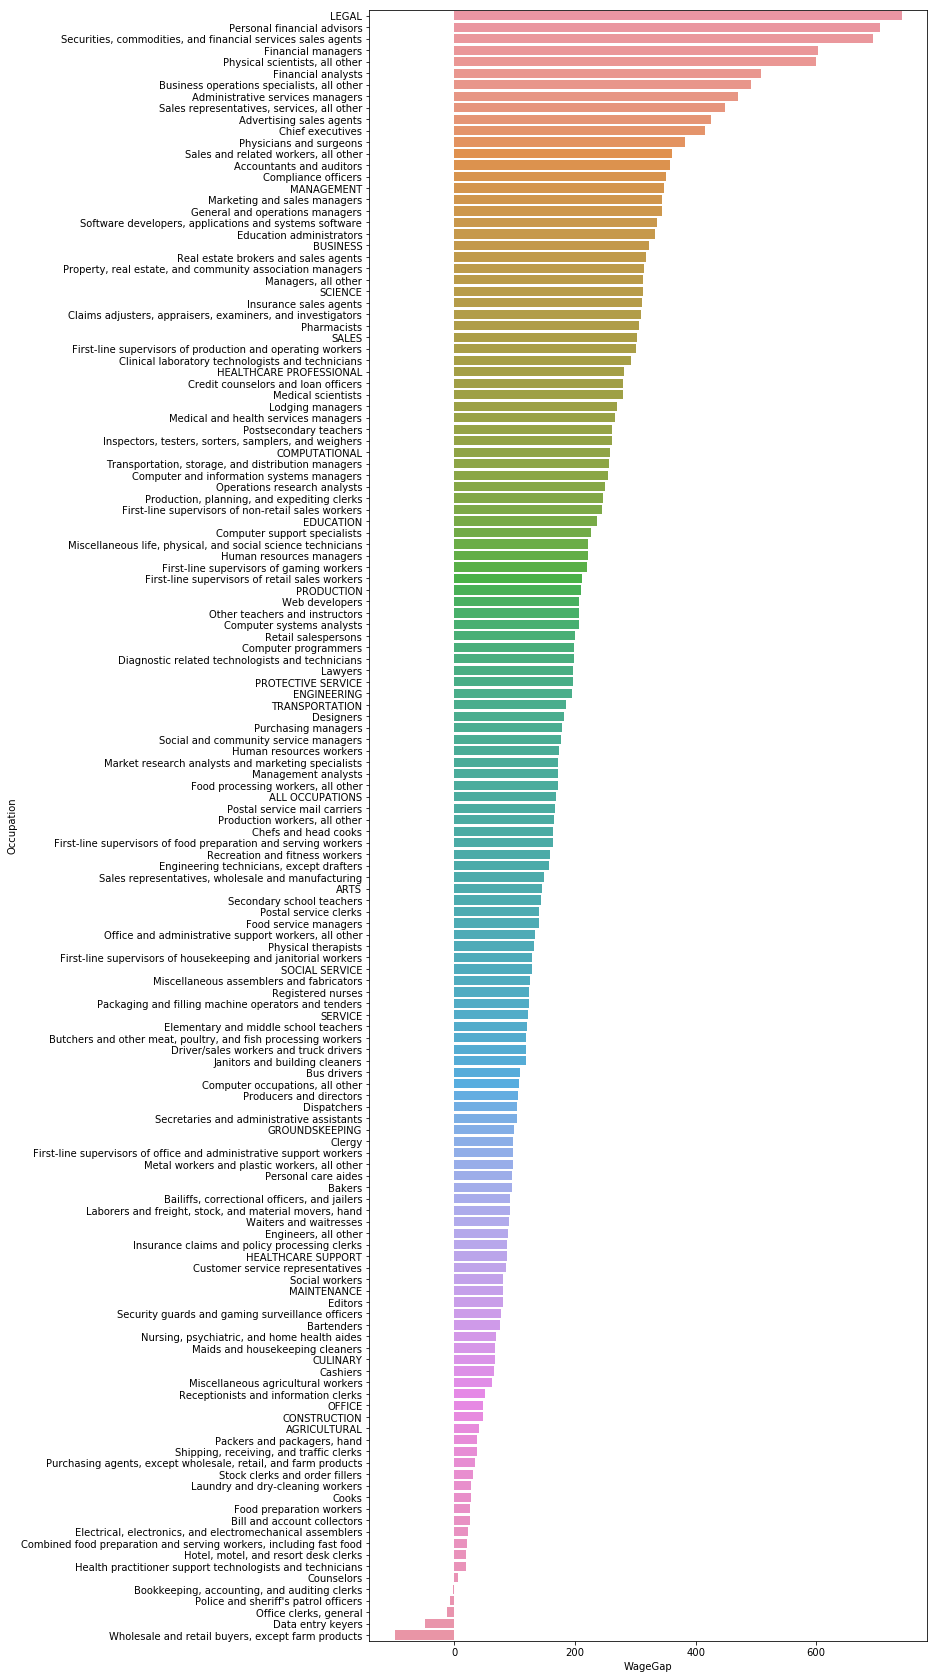

In [57]:
# Lets look at the gap between Men and Women for weekly income
plt.figure(figsize=((10,30)))
sns.barplot(x='WageGap',
            y='Occupation',
            data=cleanedgenderwage.sort_values('WageGap', ascending=False))
plt.show()

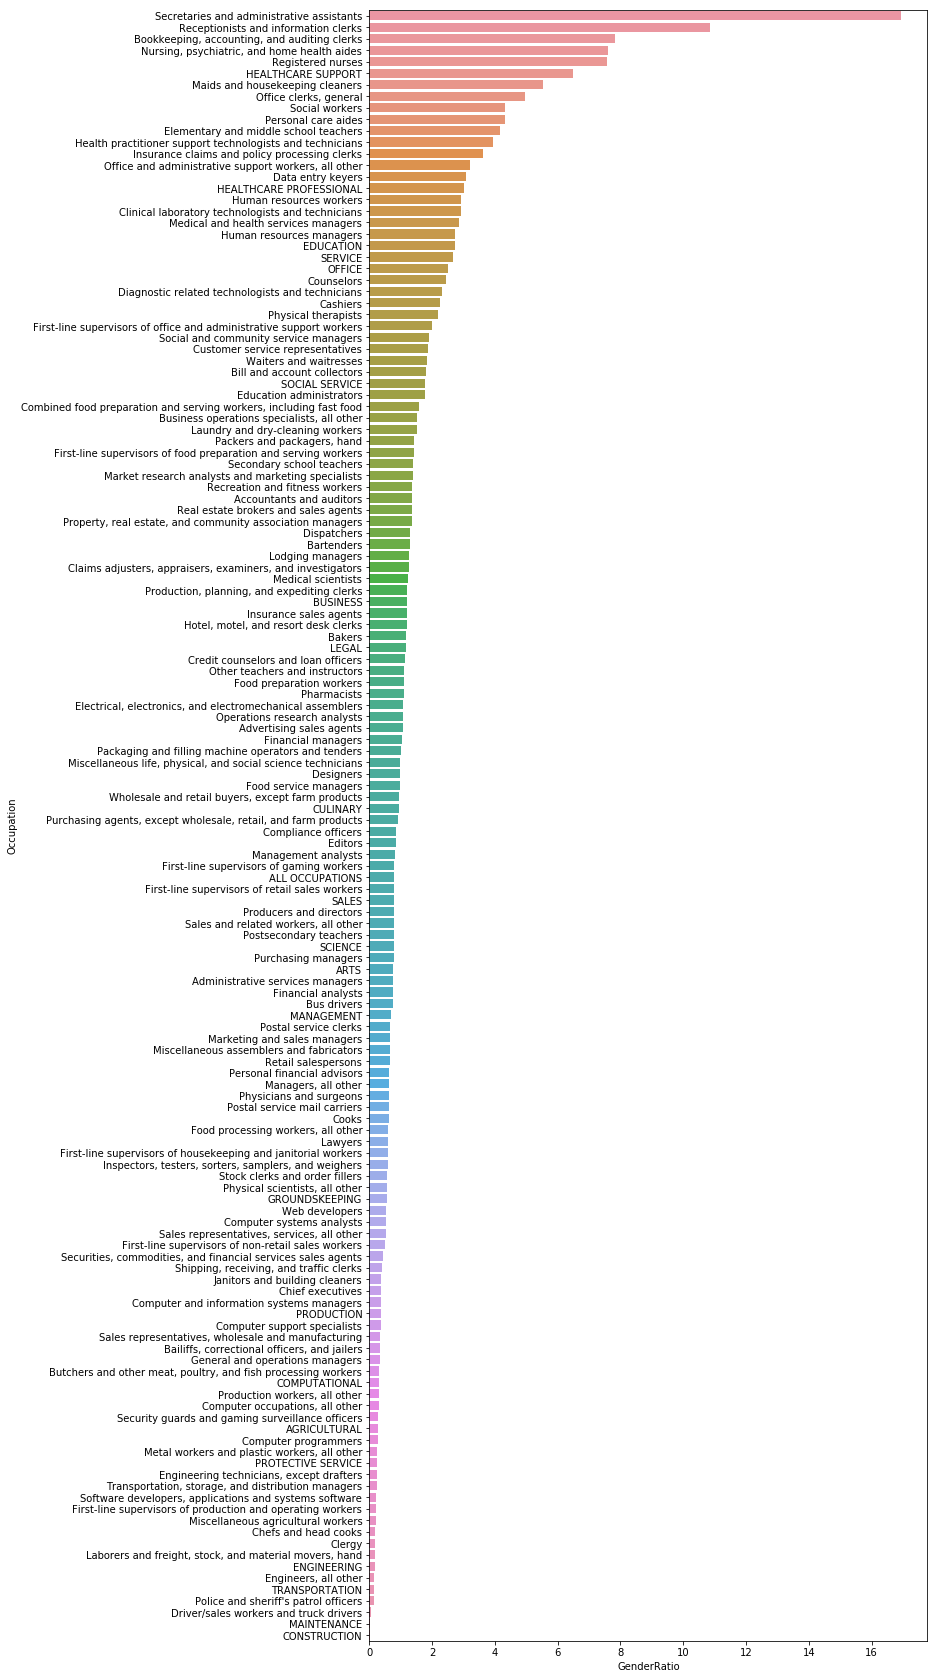

In [58]:
# Now lets look at the ratio of workers
plt.figure(figsize=((10,30)))
sns.barplot(x='GenderRatio',
            y='Occupation',
            data=cleanedgenderwage.sort_values('GenderRatio', ascending=False))
plt.show()

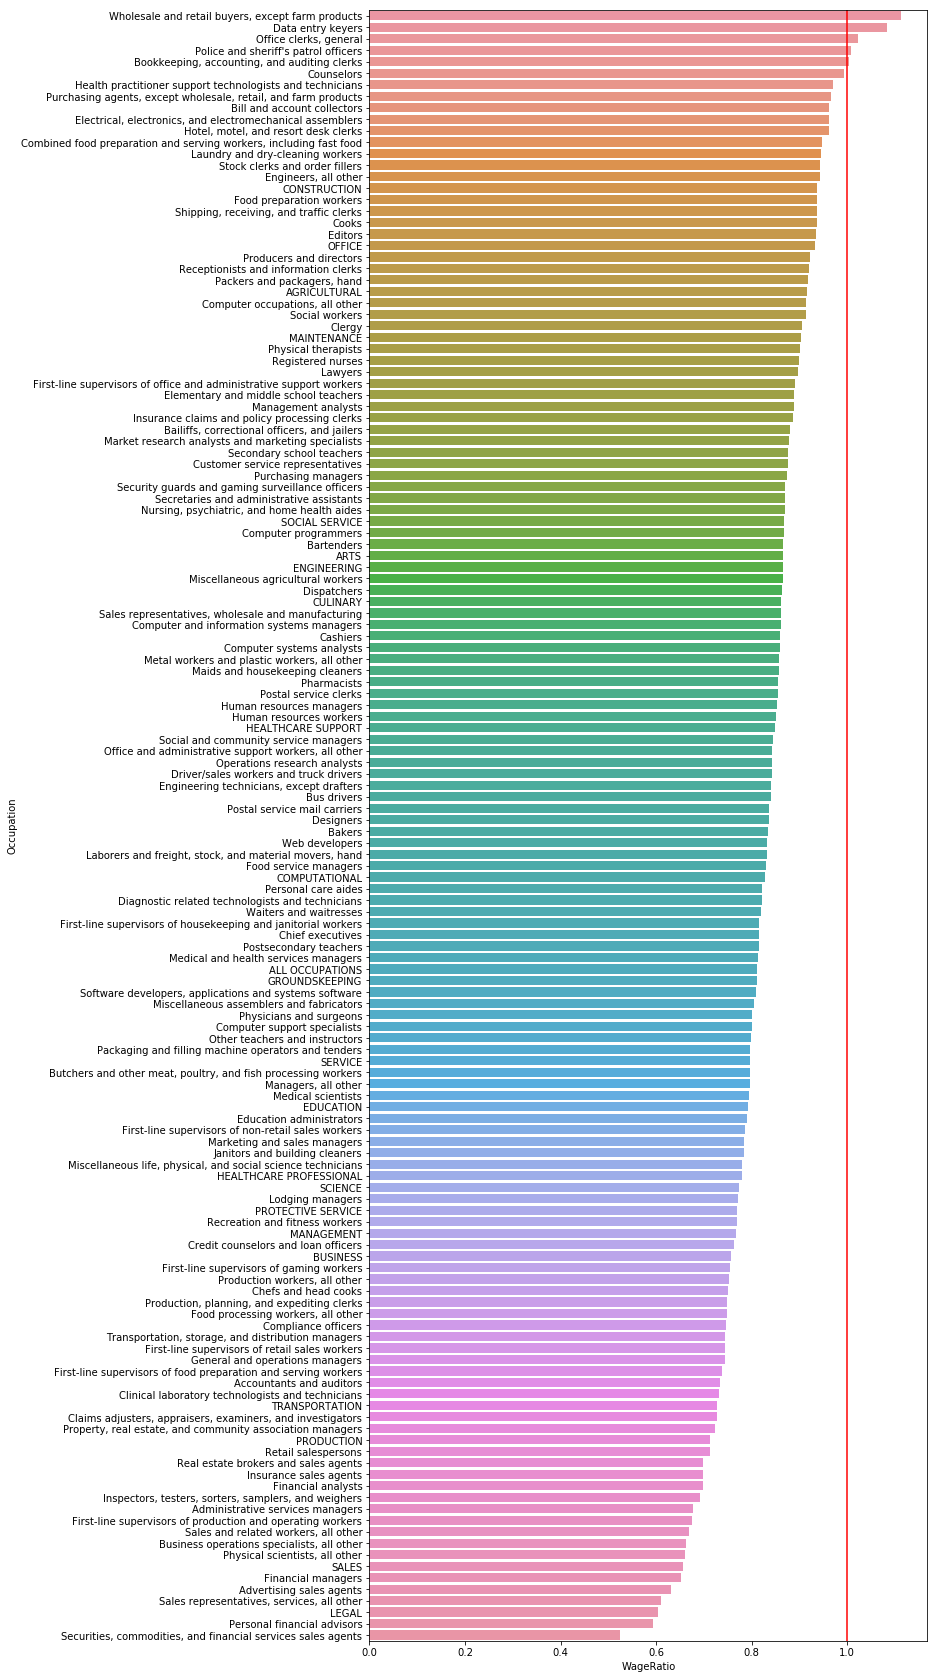

In [59]:
# Look at wage ratio by occupation
plt.figure(figsize=((10,30)))
sns.barplot(x='WageRatio',
            y='Occupation',
            data=cleanedgenderwage.sort_values('WageRatio', ascending=False))
plt.axvline(x=1, color='red', linestyle='solid')
plt.show()

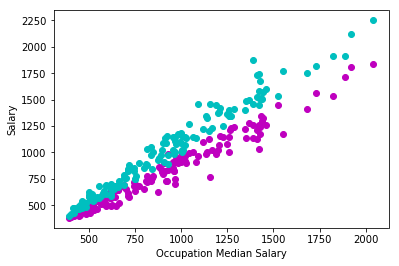

In [63]:
# look at female wages vs male wages on a scatter plot
plt.plot(cleanedgenderwage['All_weekly'], cleanedgenderwage['F_weekly'], 'o', color='m')
plt.plot(cleanedgenderwage['All_weekly'], cleanedgenderwage['M_weekly'], 'o', color='c')
plt.xlabel('Occupation Median Salary')
plt.ylabel('Salary')
plt.show()

In [44]:
# look at F vs M wages on a scatter plot for only the categories

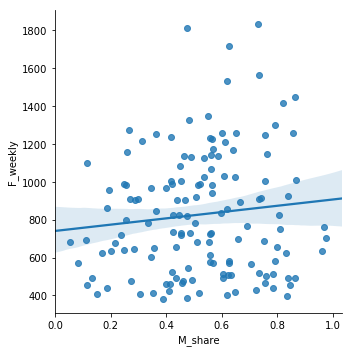

In [45]:
sns.lmplot(x='M_share', y='F_weekly', data=cleanedgenderwage)
plt.show()

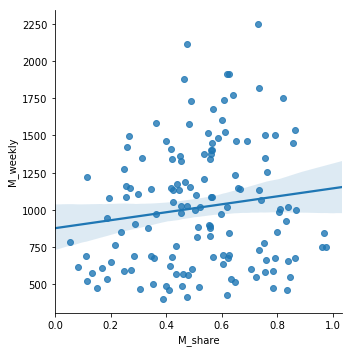

In [46]:
# lmplot of male wages vs male share
sns.lmplot(x='M_share', y='M_weekly', data=cleanedgenderwage)
plt.show()

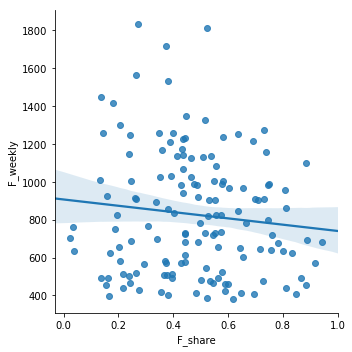

In [47]:
# lmplot of female wages vs female share
sns.lmplot(x='F_share', y='F_weekly', data=cleanedgenderwage)
plt.show() # looks like as women take over a field, it just pays less -.- 

In [48]:
cleanedgenderwage.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap,WageRatio,GenderRatio,F_share,M_share,All_Workers_Difference
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,169.0,0.811173,0.795674,0.443106,0.556894,0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,347.0,0.766487,0.701991,0.412420,0.587500,1
2,Chief executives,1046,2041.0,763,2251.0,283,1836.0,415.0,0.815637,0.370904,0.270554,0.729446,0
3,General and operations managers,823,1260.0,621,1347.0,202,1002.0,345.0,0.743875,0.325282,0.245443,0.754557,0
6,Marketing and sales managers,948,1462.0,570,1603.0,378,1258.0,345.0,0.784779,0.663158,0.398734,0.601266,0


In [49]:
categories = []
for i in genderwage['Occupation']:
    if i.isupper()==True:
        categories.append(i)

In [67]:
categories_df = genderwage.loc[genderwage['Occupation'].isin(categories)].reset_index(drop=True)


In [68]:
categories_df[['All_weekly',
            'M_weekly',
            'F_weekly']] = categories_df[['All_weekly',
                                       'M_weekly',
                                       'F_weekly']].apply(pd.to_numeric, errors='coerce')

categories_df['WageRatio'] = categories_df['F_weekly'] / categories_df['M_weekly']
categories_df['GenderRatio'] = categories_df['F_workers'] / categories_df['M_workers']
categories_df['WageGap'] = categories_df['M_weekly'] - categories_df['F_weekly']
categories_df['F_share'] = categories_df['F_workers'] / categories_df['All_workers']
categories_df['M_share'] = categories_df['M_workers'] / categories_df['All_workers']
categories_df['All_Workers_Difference'] = categories_df['All_workers'] - (categories_df['M_workers'] + categories_df['F_workers'])


categories_df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageRatio,GenderRatio,WageGap,F_share,M_share,All_Workers_Difference
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726,0.811173,0.795674,169,0.443106,0.556894,0
1,MANAGEMENT,12480,1351,7332,1486,5147,1139,0.766487,0.701991,347,0.412420,0.587500,1
2,BUSINESS,5942,1137,2686,1327,3256,1004,0.756594,1.212211,323,0.547964,0.452036,0
3,COMPUTATIONAL,4009,1428,3036,1503,973,1245,0.828343,0.320487,258,0.242704,0.757296,0
4,ENGINEERING,2656,1424,2272,1452,383,1257,0.865702,0.168574,195,0.144202,0.855422,1


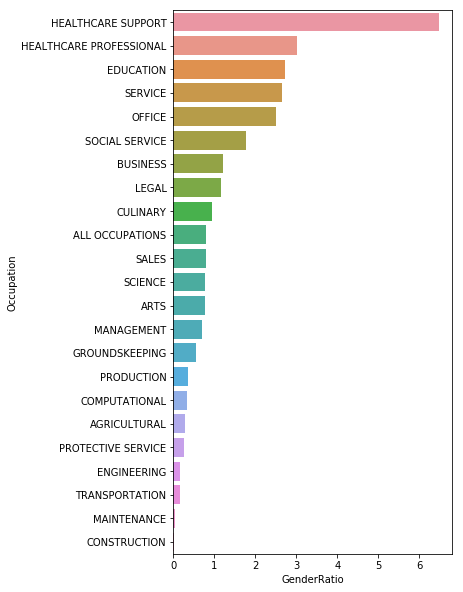

In [51]:
# Lets look at the gender ratio for just the occupational categories

plt.figure(figsize=((5,10)))
sns.barplot(x='GenderRatio',
            y='Occupation',
            data=categories_df.sort_values('GenderRatio', ascending=False))
plt.show()

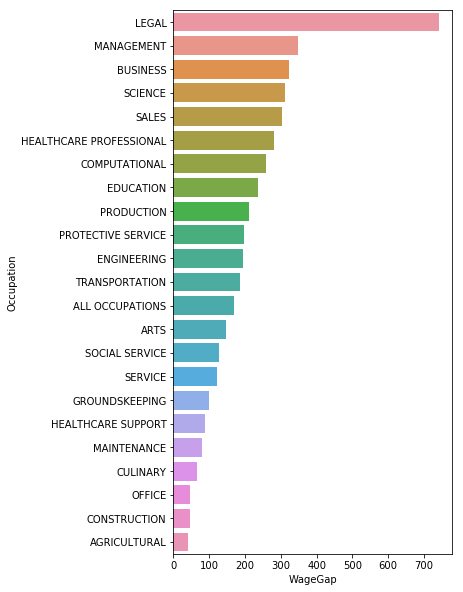

In [62]:
# Now lets see the wage gap
plt.figure(figsize=((5,10)))
sns.barplot(x='WageGap',
            y='Occupation',
            data=categories_df.sort_values('WageGap', ascending=False))
plt.show()

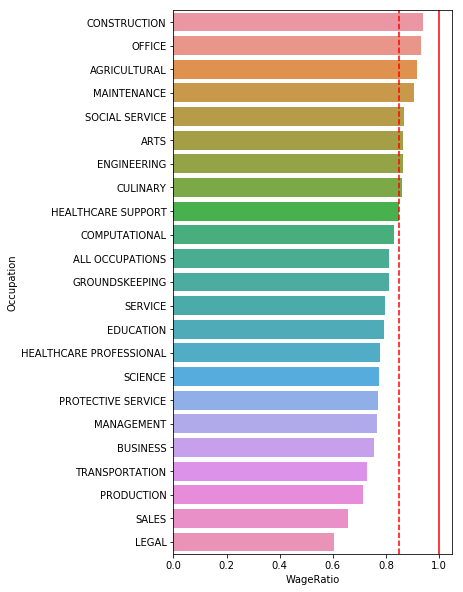

In [72]:
# Looking at wage ratios for men v women
# Red line indicates equal to mens wages, dashed line is 15% less 
plt.figure(figsize=((5,10)))
sns.barplot(x='WageRatio',
            y='Occupation',
            data=categories_df.sort_values('WageRatio', ascending=False))
plt.axvline(x=.85, color='red', linestyle='dashed')
plt.axvline(x=1, color='red', linestyle='solid')
plt.show()

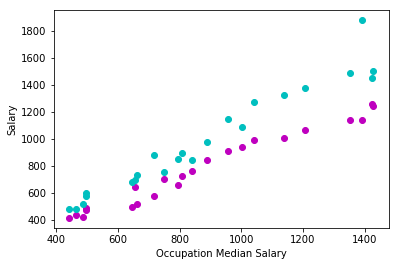

In [66]:
# Mens vs Womens salaries
plt.plot(categories_df['All_weekly'], categories_df['F_weekly'], 'o', color='m')
plt.plot(categories_df['All_weekly'], categories_df['M_weekly'], 'o', color='c')
plt.xlabel('Occupation Median Salary')
plt.ylabel('Salary')
plt.show()

In [53]:
# Put model here

In [54]:
# and here

In [55]:
# Put hyper parameter adjustment here

In [56]:
# Put model validation here

# Put conclusion here